In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [4]:
# Generating random value 
cgpa = np.random.uniform(1,10, 100)
resume_marks = np.random.uniform(1,5, 100)
placement = np.random.randint(0,2,100) 


In [5]:
data = {
    "cgpa": cgpa, 
    "resume_marks" : resume_marks, 
    "placement" : placement
}

In [6]:
df = pd.DataFrame(data)

In [8]:
df.head() 

,cgpa,resume_marks,placement
0,9.062331,1.742642,1
1,2.771952,3.641660,0
2,4.480163,4.108809,1
3,1.809206,3.558862,0
4,6.059410,3.230557,0


<Axes: xlabel='cgpa', ylabel='resume_marks'>

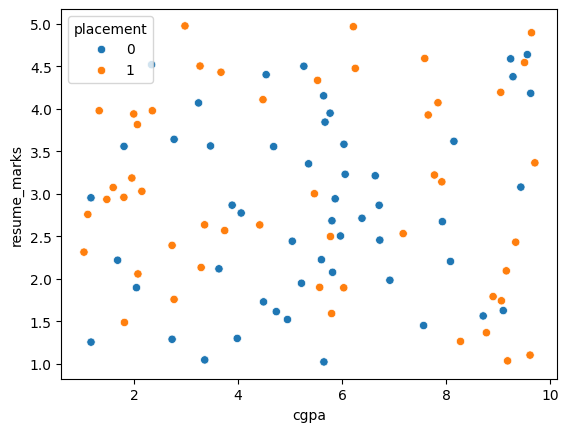

In [11]:
sns.scatterplot(x= df.cgpa, y= df.resume_marks, hue= df.placement)

In [12]:
# its a random data , its not representative of the real world so yah 

In [13]:
# lets use another data 
df = pd.read_csv('placement.csv')

In [14]:
df.head() 


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

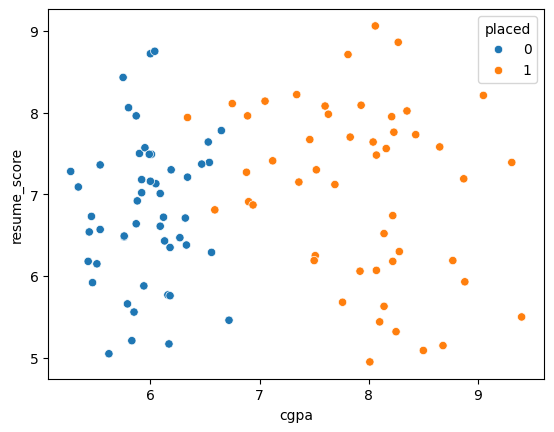

In [17]:
sns.scatterplot(x= df.cgpa, y= df.resume_score, hue= df.placed)

In [18]:
X = df.iloc[:, 0:2]
y = df.iloc[:,-1]

In [19]:
from sklearn.linear_model import Perceptron

In [20]:
model = Perceptron()

In [21]:
model.fit(X,y)

Perceptron()

In [22]:
model.coef_

array([[ 40.26, -36.  ]])

In [23]:
model.classes_


array([0, 1], dtype=int64)

In [24]:
model.intercept_

array([-25.])

In [25]:
from mlxtend.plotting import plot_decision_regions

c:\Users\sapko\miniconda3\envs\100days\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

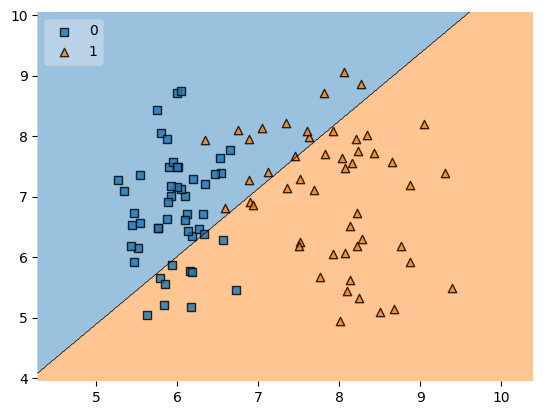

In [26]:
plot_decision_regions(X.values, y.values, clf= model , legend=2)

The above model is not performing properly as this is prone to error lets fix it 
<br/> What we will be doing is 
- creating the train test split 
- performing the scaling operation 
- hyperparameter tunining 

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
print(X_train_scaled.shape, X_test_scaled.shape)

(80, 2) (20, 2)


In [34]:
print(type(X_train_scaled))

<class 'numpy.ndarray'>


In [36]:
X_train_scaled[0:5, :]

array([[-0.00860198, -0.12892612],
       [ 1.00129271, -0.92538093],
       [-0.60738909, -0.52715352],
       [-0.04435046, -0.08910338],
       [ 0.99235559,  2.05136891]])

The StandardScaler in scikit-learn is a preprocessing module used to standardize features by removing the mean and scaling them to unit variance. This is also known as z-score normalization. Standardization is a common requirement for many machine learning estimators since they might behave badly if the individual features do not more or less look like standard normally distributed data.

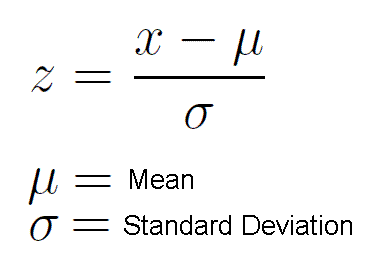

# StandardScaler Methods

## fit_transform(X):

- This method fits the StandardScaler to the data `X` and then transforms `X`.
- During the fitting process, the scaler computes the mean and standard deviation of each feature in `X`.
- Then, it applies the transformation to standardize the features using the computed mean and standard deviation.
- The method returns the transformed data.

## transform(X):

- This method applies the transformation to the data `X` based on the mean and standard deviation computed during the fitting process.
- It does not recompute the mean and standard deviation; instead, it uses the values learned from the training data during the fitting process.
- The method returns the transformed data.

In summary, `fit_transform` is used on the training data to both fit the scaler and transform the data, while `transform` is used on the testing or unseen data to apply the same transformation learned from the training data. This ensures consistency in preprocessing between training and testing datasets, which is crucial for model generalization.


In [37]:

# Initialize Perceptron model
model = Perceptron()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001]
}


In [38]:
# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train) 

GridSearchCV(cv=5, estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'eta0': [0.1, 0.01, 0.001],
                         'max_iter': [1000, 2000, 3000]},
             scoring='accuracy')

In [39]:



# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000}


In [40]:

# Train model with best hyperparameters
best_model = grid_search.best_estimator_


In [41]:
best_model.fit(X_train_scaled, y_train)

Perceptron(eta0=0.1)

<Axes: >

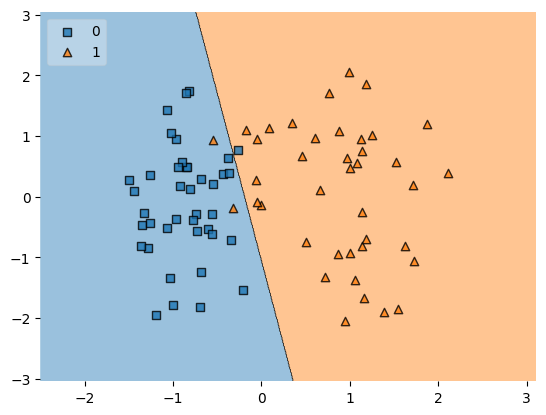

In [42]:
# Plot decision regions
plot_decision_regions(X_train_scaled, y_train.values, clf=best_model, legend=2)

In [ ]:
# This one is much much more better than the previous one 